In [1]:
from scipy.stats import gaussian_kde
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import scipy.signal
from tensorflow.keras.models import load_model
import warnings

warnings.filterwarnings("ignore")

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)



# define custom color scheme
colors = [plt.cm.Spectral(i/float(10-1)) for i in range(20)]

#for i in range(10):
#    plt.scatter(i, i, color=colors[i], s=500)

cs = {
    "Bordeaux": colors[0],
    "Light Red": colors[1],
    "Orange": colors[2],
    "Gold": colors[3],
    "Yellow": colors[4],
    "Lime": colors[5],
    "Light Green": colors[6],
    "Teal": colors[7],
    "Blue": colors[8],
    "Purple": colors[9]
}


def weight_space_distance(model1, model2, method='euclidean'):
    """
    Compute the distance between two models in the weight space.
    
    Args:
        model1: First TensorFlow model
        model2: Second TensorFlow model
        method: Distance metric ('euclidean')
    
    Returns:
        Distance value
    """
    # Get weights as flattened arrays
    weights1 = np.concatenate([w.numpy().flatten() for w in model1.weights])
    weights2 = np.concatenate([w.numpy().flatten() for w in model2.weights])
    
    if method == 'euclidean' or method == 'l2':
        return np.sqrt(np.sum((weights1 - weights2)**2)) 
    else:
        raise ValueError(f"Unknown distance method: {method}")
        

2025-02-25 16:57:38.623036: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Models_16_8_2_8_16_ReLU
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Models_16_2_16_ReLU
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Models_8_2_8_ReLU
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Models_4_2_4_ReLU
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


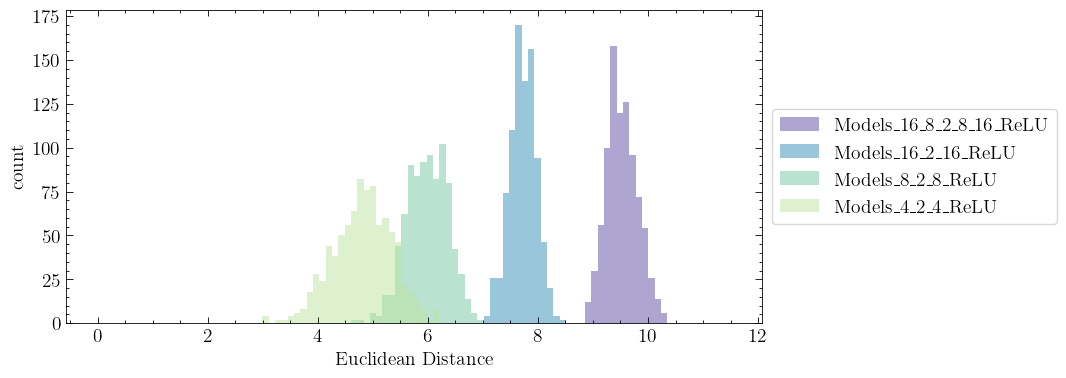

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

niter = 50
euclidean_dist = np.empty((niter, niter))

plt.subplots(1, 1, figsize=(8, 4))

folders = ["Models_16_8_2_8_16_ReLU", "Models_16_2_16_ReLU","Models_8_2_8_ReLU","Models_4_2_4_ReLU"]  
f=0

for folder in folders:  # Loop over each folder
    print(folder)
    for i in range(niter):
        print(i)
        model_i = load_model(f'./{folder}/encoder_model_{i}.h5',compile=False)
        for j in range(i + 1, niter):
            model_j = load_model(f'./{folder}/encoder_model_{j}.h5',compile=False)
            
            # Compute distances
            euclidean_dist[i, j] = weight_space_distance(model_i, model_j)
            euclidean_dist[j, i] = euclidean_dist[i, j]  # Ensure symmetry

    # Extract off-diagonal elements
    off_diag = [euclidean_dist[i, j] for i in range(niter) for j in range(niter) if i != j]

    # Plot histogram
    plt.hist(off_diag, range=(0, 11.5), bins=100, alpha=0.5, color=colors[9-f], edgecolor='none',label=folder)
    f=f+1
    euclidean_dist = np.empty((niter, niter))

plt.xlabel("Euclidean Distance")
plt.ylabel("count")
plt.tight_layout()
plt.legend(loc="center left", bbox_to_anchor=(+1, 0.5))
filename='distances_parameter_space.png'
plt.savefig(filename, dpi=300)
plt.show()


